98260만개 data (교수님+우리+오리지널)

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
nd1=np.load('mnist_20211236_total.npz')#이윤재
nd2=np.load('mnist_20201572_1.npz')#구유정
nd3=np.load('mnist_20171372.npz')#김석우
nd4=np.load('mnist_20170565.npz')#김성년
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_total.npz', X=X, y=y)
nd5=np.load('mnist_total.npz')
nd5
X.shape
X=X.reshape(30720,784)
#X_new=X[23040:30720]
#y_new=y[23040:30720]
#X_new.shape
#y_new.shape
type(X)

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


numpy.ndarray

data cleaning 작업

In [3]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [4]:
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape


(28260, 784)

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame
y_mnist=y_mnist.astype(np.uint8)
X.shape
y.shape

(30720,)

In [6]:
X_final=np.concatenate((X_new,X_mnist))
y_final=np.concatenate((y_new,y_mnist))

mnist를 dataframe 에서 array 로 변환(concatate 하더라도 mnist 변수 따로 쓰면 data frame 이므로.)

In [7]:
X_mnist=np.array(X_mnist)


print(X_mnist.shape)
print(type(X_mnist))

y_mnist=np.array(y_mnist)


print(y_mnist.shape)
print(type(y_mnist))

(70000, 784)
<class 'numpy.ndarray'>
(70000,)
<class 'numpy.ndarray'>


# 8:1:1로 data split

In [8]:
from sklearn.model_selection import train_test_split
X_train0, X_test, y_train0, y_test = train_test_split(X_final, y_final, test_size=0.1, shuffle =True, random_state = 8)
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0,test_size=float(1/9), shuffle =True,random_state= 8) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(78608, 784) (9826, 784) (9826, 784)
(78608,) (9826,) (9826,)


------------------------------------------------------
##여기서부터 모델 학습

scaling

mlp fit


In [9]:
#일반적으로 standardscaler로 scaling
import time
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

mlp_clf=MLPClassifier(random_state=42)

start_time=time.time()
mlp_clf.fit(X_train,y_train)
print('Fit time : ', time.time()-start_time)

Fit time :  179.78951406478882


accuracy

In [10]:
from sklearn.metrics import accuracy_score
import time
start_time = time.time()
pred =mlp_clf.predict(X_val)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_val, pred))

Fit time :  0.057393789291381836
0.8680032566659882


In [11]:
#처음에 fit을 X_train과 y_train을 6만개 정도 넘겨줬는데 너무 오래 걸려서 10000개 가지고만 best param 찾음.

In [12]:
from sklearn.model_selection import GridSearchCV

mlp_clf=MLPClassifier(random_state=42)
params={'hidden_layer_sizes':list(range(300,400,10))}
mlp_grid=GridSearchCV(mlp_clf,param_grid=params,cv=5,n_jobs=-1)
%time mlp_grid.fit(X_train[:10000],y_train[:10000])

CPU times: user 2min 32s, sys: 27.3 s, total: 2min 59s
Wall time: 8min 20s


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [300, 310, 320, 330, 340, 350,
                                                360, 370, 380, 390]})

In [13]:
%time mlp_grid.best_estimator_.fit(X_train,y_train)
print(f'{mlp_grid.best_params_}{mlp_grid.best_estimator_.score(X_val,y_val):0.4f}')

CPU times: user 36min, sys: 5min 50s, total: 41min 51s
Wall time: 5min 42s
{'hidden_layer_sizes': 360}0.9084


좋은 scaling 선정

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
sX_train_scaled = scaler.transform(X_train)
sX_val_scaled = scaler.transform(X_val)


from sklearn.preprocessing import RobustScaler
rscaler=RobustScaler()
rscaler.fit(X_train)
rX_train_scaled = rscaler.transform(X_train)
rX_val_scaled = rscaler.transform(X_val)


from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
mscaler.fit(X_train)
mX_train_scaled = mscaler.transform(X_train)
mX_val_scaled = mscaler.transform(X_val)

from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

In [15]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  clf.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=clf.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [16]:
names=["mlp"]
classifiers=[MLPClassifier()]

for name,clf in zip(names,classifiers):
  scaling_names=['No_scaling','StandardScaler','RobustScalar','MinmaxScalaer','Normalizer']
  t_score=[]
  t_fit_times=[]
  t_pred_times=[]

  #no scaling
  score,fit_time,pred_time=fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val)
  t_score.append(score)
  t_fit_times.append(fit_time)
  t_pred_times.append(pred_time)


  try:
    #standardScaler
    sscore,sfit_time,spred_time=fit_and_calScoreTime(clf,sX_train_scaled,sX_val_scaled,y_train,y_val)
    t_score.append(sscore)
    t_fit_times.append(sfit_time)
    t_pred_times.append(spred_time)

    #RobustScaler
    rscore,rfit_time,rpred_time=fit_and_calScoreTime(clf,rX_train_scaled,rX_val_scaled,y_train,y_val)
    t_score.append(rscore)
    t_fit_times.append(rfit_time)
    t_pred_times.append(rpred_time)

    #MinmaxScalaer
    mscore,mfit_time,mpred_time=fit_and_calScoreTime(clf,mX_train_scaled,mX_val_scaled,y_train,y_val)
    t_score.append(mscore)
    t_fit_times.append(mfit_time)
    t_pred_times.append(mpred_time)

    #Normalizer
    nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)
    t_score.append(nscore)
    t_fit_times.append(nfit_time)
    t_pred_times.append(npred_time)

  except ValueError:
    continue

/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
print(t_score)
#print(t_fit_times)     
#print( t_pred_times)

[0.8680032566659882, 0.7713209851414614, 0.8220028495827397, 0.8378790962751883, 0.8948707510685935]


In [18]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  %time mlp_grid.best_estimator_.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=mlp_grid.best_estimator_.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [19]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)

print(nscore)
print(nfit_time)     
print( npred_time)

CPU times: user 31min 19s, sys: 5min 25s, total: 36min 45s
Wall time: 5min 15s
0.9215347038469367
315.008985042572
0.04496908187866211


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

In [ ]:
title = "Learning Curves (Multiple Layer Perceptron)"

# Cross validation with 5 iterations each time with 20% data 
# randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = mlp_grid.best_estimator_.fit(X_train,y_train)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

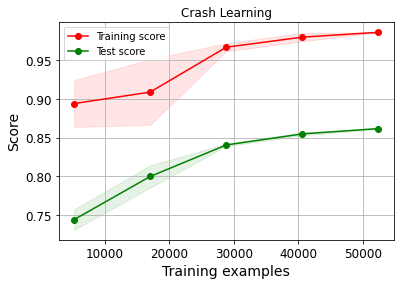

In [22]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X_final, y_final, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_final, y_final, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    plt.show()

from sklearn.pipeline import make_pipeline
pipe_mlp = make_pipeline(MLPClassifier(random_state=1))
plot_learning_curve(pipe_mlp,"Crash Learning", X_train, y_train,cv=3)

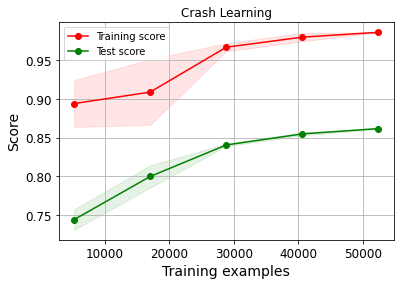

In [24]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X_, y_val, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_val, y_val, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    plt.show()

from sklearn.pipeline import make_pipeline
pipe_mlp = make_pipeline(MLPClassifier(random_state=1))
plot_learning_curve(pipe_mlp,"Crash Learning", X_val, y_val,cv=3)

Start


  0%|          | 0/25 [00:00<?, ?it/s]

/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


End
Time: 8155.6900sec
Saving figure early_stopping_plot


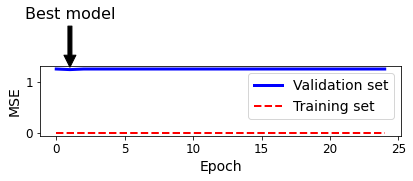

In [28]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
import time
from tqdm import tqdm
from tqdm.auto import tqdm
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

minimum_val_error=float("inf")
best_epoch=None
best_model=mlp_clf
start_time = time.time()
print("Start")
train_errors, val_errors = [], []
for epoch in tqdm(range(25)):

    mlp_clf=MLPClassifier(random_state=42,warm_start=True,hidden_layer_sizes=330)
    mlp_clf.fit(nX_train_scaled,y_train)
    y_train_predict = mlp_clf.predict(nX_train_scaled)
    y_pred_mlp = mlp_clf.predict(nX_val_scaled)  #모델
    val_error = mean_squared_error(y_val, y_pred_mlp)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_pred_mlp))
    if val_error < minimum_val_error:
        minimum_val_error=val_error
        best_model= mlp_clf #모델
best_epoch = np.argmin(val_errors) #val_error가 최소가 되는 index
best_val_mse = val_errors[best_epoch] #best epoch일 때 val_errer의 mse

print("End")
print("Time: {:.4f}sec".format((time.time() - start_time)))

plt.annotate('Best model',
             xy=(best_epoch, best_val_mse),
             xytext=(best_epoch, best_val_mse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show() 